### Project Structure

The hands on project on **Exploratory Data Analysis With Python and Pandas** is divided into following tasks:

#### Task 1: Initial Data Exploration

In this task, we are introduced to the project and learning outcomes.

Once we are familiarized with the Rhyme interface, we begin working in Jupyter Notebooks, a web-based interactive computational environment for creating notebook documents.

Next, we will import essential libraries such as NumPy, Pandas, Seaborn, Matplotlib and so on.

We use Pandas to read in the data, get a brief glimpse of the first few rows, and calculate some quick summary statistics of the numeric columns.

#### Task 2: Univariate Analysis

In this task, we conduct univariate analysis on both continuous and categorical variables.

We first plot the distribution of customer ratings with seaborn and also overlay the mean, 25th and 75th percentile quantiles calculated using Numpy.

We then use Pandas' .hist() method to plot the distribution for all numeric variables.

Using Seaborn's .countplot() method, we see the frequency distribution of 'Branch' and 'Payment' which are categorical variables.

#### Task 3: Bivariate Analysis

In this task, we conduct bivariate analysis on both continuous and categorical variables.

We use Seaborn to plot scatterplots and regression plots to identify the relationship between customer rating and gross income.

Additionally, we use Seaborn to plot a boxplot to check the difference in aggregate sales figures between the three branches of supermarkets, and to compare sales patterns between men and women.

We plot a time series graph to check for trends in gross income over a period of three months.

#### Task 4: Dealing With Duplicate Rows and Missing Values

In this task, we identify and deal with duplicate rows and missing values in our dataset.

We calculate the number of duplicate rows and delete them using Pandas.

We then do the same with missing values, but instead of deleting those rows, we replace missing values by the means of their respective columns.

We explore our dataset using Pandas Profiler to see how we can automate a lot of exploratory data analysis given certain conditions are met.

#### Task 5: Correlation Analysis

In this task, we conduct correlation analysis on the numeric variables in our dataset.

We use Numpy to calculate the correlation between two numeric variables.

We then use pandas to calculate a correlation matrix to show all pairwise correlations of numeric variables.

Finally, we use seaborn to plot the calculated correlation matrix as a heatmap that is easily interpretable.

<h2 align=center>Exploratory Data Analysis With Python and Pandas</h2>
<img src="logo.png">

### Libraries

In [1]:
import pandas as pd              # pandas is a data manipulation library
import numpy as np               # numpy is a scientific computing library
import matplotlib.pyplot as plt  # matplotlib and seaborn are very popular data visualization library
import seaborn as sns
import calmap                    # calmap is a calendar heatmap library
from pandas_profiling import ProfileReport       # pandas_profiling is a library that streamlines a lot of our exploratory data analysis

/Users/shihaosun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  


Link to data source: https://www.kaggle.com/aungpyaeap/supermarket-sales

**Context**

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data.

**Data Dictionary**

1. ***Invoice id:*** Computer generated sales slip invoice identification number

2. ***Branch:*** Branch of supercenter (3 branches are available identified by A, B and C).

3. ***City:*** Location of supercenters

4. ***Customer type:*** Type of customers, recorded by Members for customers using member card and Normal for without member card.

5. ***Gender:*** Gender type of customer

6. ***Product line:*** General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

7. ***Unit price:*** Price of each product in USD

8. ***Quantity:*** Number of products purchased by customer

9. ***Tax:*** 5% tax fee for customer buying

10. ***Total:*** Total price including tax

11. ***Date:*** Date of purchase (Record available from January 2019 to March 2019)

12. ***Time:*** Purchase time (10am to 9pm)

13. ***Payment:*** Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

14. ***COGS:*** Cost of goods sold

15. ***Gross margin percentage:*** Gross margin percentage

16. ***Gross income:*** Gross income

17. ***Rating:*** Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

### Task 1: Initial Data Exploration

In [2]:
df = pd.read_csv('supermarket_sales.csv')

In [3]:
display(df.head())
display(df.tail())

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total     Date  \
0       Health and beauty       74.69       7.0  26.1415  548.9715   1/5/19   
1  Electronic accessories       15.28       5.0   3.8200   80.2200   3/8/19   
2      Home and lifestyle       46.33       7.0  16.2155  340.5255   3/3/19   
3       Health and beauty       58.22       8.0  23.2880  489.0480  1/27/19   
4       Sports and travel       86.31       7.0  30.2085  634.3785   2/8/19   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

Invoice ID Branch      City Customer type  Gender  \
998   347-56-2442      A    Yangon        Normal    Male   
999   849-09-3807      A    Yangon        Member  Female   
1000  849-09-3807      A    Yangon        Member  Female   
1001  745-74-0715      A    Yangon        Normal    Male   
1002  452-04-8808      B  Mandalay        Normal    Male   

                Product line  Unit price  Quantity  Tax 5%    Total     Date  \
998       Home and lifestyle       65.82       1.0   3.291   69.111  2/22/19   
999      Fashion accessories       88.34       7.0  30.919  649.299  2/18/19   
1000     Fashion accessories       88.34       7.0  30.919  649.299  2/18/19   
1001  Electronic accessories         NaN       2.0   5.803  121.863  3/10/19   
1002  Electronic accessories       87.08       NaN  30.478  640.038  1/26/19   

       Time  Payment    cogs  gross margin percentage  gross income  Rating  
998   15:33     Cash   65.82                 4.761905         3.291     4.1  
999   13:28     Cash  618.38                 4.761905        30.919     6.6  
1000  13:28     Cash  618.38                 4.761905        30.919     6.6  
1001  20:46  Ewallet  116.06                 4.761905         5.803     8.8  
1002  15:17     Cash  609.56                 4.761905        30.478     5.5

In [4]:
# Look at the columns
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [5]:
# Want to see the data type of each columns
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                   float64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [6]:
# 'Date' column should be type datetime instead of object
display(df['Date'])

df['Date'] = pd.to_datetime(df['Date'])

display(df['Date'])
display(df.dtypes)

0        1/5/19
1        3/8/19
2        3/3/19
3       1/27/19
4        2/8/19
         ...   
998     2/22/19
999     2/18/19
1000    2/18/19
1001    3/10/19
1002    1/26/19
Name: Date, Length: 1003, dtype: object

0      2019-01-05
1      2019-03-08
2      2019-03-03
3      2019-01-27
4      2019-02-08
          ...    
998    2019-02-22
999    2019-02-18
1000   2019-02-18
1001   2019-03-10
1002   2019-01-26
Name: Date, Length: 1003, dtype: datetime64[ns]

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                          float64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

In [7]:
# it is convention to set the Date column as the index for the dataframe
df.set_index('Date', inplace=True)
df.head()

Invoice ID Branch       City Customer type  Gender  \
Date                                                              
2019-01-05  750-67-8428      A     Yangon        Member  Female   
2019-03-08  226-31-3081      C  Naypyitaw        Normal  Female   
2019-03-03  631-41-3108      A     Yangon        Normal    Male   
2019-01-27  123-19-1176      A     Yangon        Member    Male   
2019-02-08  373-73-7910      A     Yangon        Normal    Male   

                      Product line  Unit price  Quantity   Tax 5%     Total  \
Date                                                                          
2019-01-05       Health and beauty       74.69       7.0  26.1415  548.9715   
2019-03-08  Electronic accessories       15.28       5.0   3.8200   80.2200   
2019-03-03      Home and lifestyle       46.33       7.0  16.2155  340.5255   
2019-01-27       Health and beauty       58.22       8.0  23.2880  489.0480   
2019-02-08       Sports and travel       86.31       7.0  30.2085  634.3785   

             Time      Payment    cogs  gross margin percentage  gross income  \
Date                                                                            
2019-01-05  13:08      Ewallet  522.83                 4.761905       26.1415   
2019-03-08  10:29         Cash   76.40                 4.761905        3.8200   
2019-03-03  13:23  Credit card  324.31                 4.761905       16.2155   
2019-01-27  20:33      Ewallet  465.76                 4.761905       23.2880   
2019-02-08  10:37      Ewallet  604.17                 4.761905       30.2085   

            Rating  
Date                
2019-01-05     9.1  
2019-03-08     9.6  
2019-03-03     7.4  
2019-01-27     8.4  
2019-02-08     5.3

In [8]:
# Now we proceed to calculating some quick summary statics about the columns by using .describe()
# For every numeric columns, it calculates the summary statistic
df.describe()

Unit price    Quantity       Tax 5%        Total         cogs  \
count  996.000000  983.000000  1003.000000  1003.000000  1003.000000   
mean    55.764568    5.501526    15.400368   323.407726   308.007358   
std     26.510165    2.924673    11.715192   246.019028   234.303836   
min     10.080000    1.000000     0.508500    10.678500    10.170000   
25%     33.125000    3.000000     5.894750   123.789750   117.895000   
50%     55.420000    5.000000    12.096000   254.016000   241.920000   
75%     78.085000    8.000000    22.539500   473.329500   450.790000   
max     99.960000   10.000000    49.650000  1042.650000   993.000000   

       gross margin percentage  gross income       Rating  
count             1.003000e+03   1003.000000  1003.000000  
mean              4.761905e+00     15.400368     6.972682  
std               6.131488e-14     11.715192     1.717647  
min               4.761905e+00      0.508500     4.000000  
25%               4.761905e+00      5.894750     5.500000  
50%               4.761905e+00     12.096000     7.000000  
75%               4.761905e+00     22.539500     8.500000  
max               4.761905e+00     49.650000    10.000000

### Task 2: Univariate Analysis

**Question 1:** What does the distribution of customer ratings looks like? Is it skewed?

/Users/shihaosun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


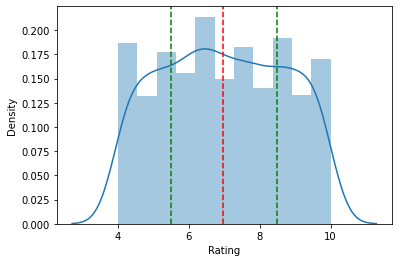

In [9]:
# We can use seaborn to plot out the distribution
sns.distplot(df['Rating'])

# There is no one rating that particularly spikes out. 
# There is pretty much equal chance someone rated it for as 4 ~ 10.

# If we want to plot the mean rating in the graph, we can use plt.axvline()
# plt.axvline(x=np.mean(df['Rating']))      # v - vertical line
# You can further style the line
plt.axvline(x=np.mean(df['Rating']), c='red', ls='--')        # c - color, ls - line style

# plot the 25th and 75th percentile
plt.axvline(x=np.percentile(df['Rating'], 25), c='green', ls='--')
plt.axvline(x=np.percentile(df['Rating'], 75), c='green', ls='--')

/Users/shihaosun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


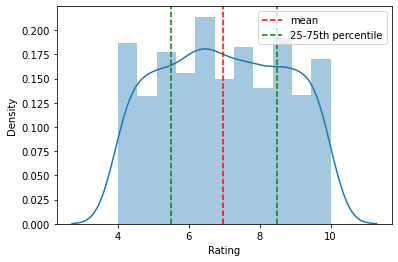

In [10]:
# You can also add a label to each line
sns.distplot(df['Rating'])
plt.axvline(x=np.mean(df['Rating']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(df['Rating'], 25), c='green', ls='--', label='25-75th percentile')
plt.axvline(x=np.percentile(df['Rating'], 75), c='green', ls='--')

# To show labels, you have to do plt.legend()
plt.legend()

So to answer the question, the distribution of user rating looks relatively uniform. And there doesn't seem to be any screw in the left or right direction.

array([[<AxesSubplot:title={'center':'Unit price'}>,
        <AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'Tax 5%'}>],
       [<AxesSubplot:title={'center':'Total'}>,
        <AxesSubplot:title={'center':'cogs'}>,
        <AxesSubplot:title={'center':'gross margin percentage'}>],
       [<AxesSubplot:title={'center':'gross income'}>,
        <AxesSubplot:title={'center':'Rating'}>, <AxesSubplot:>]],
      dtype=object)

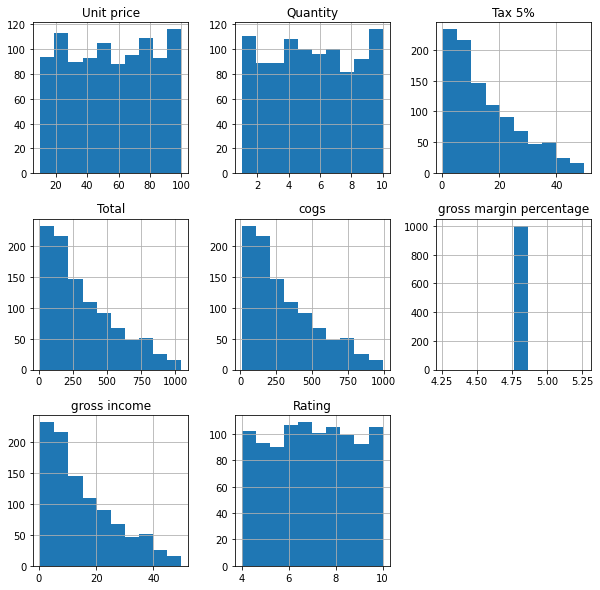

In [11]:
# If you are insterested in the distribution of other numerical varibles, you can simply plot them all at once.
df.hist(figsize=(10, 10))

* 'Unit Price', 'Quantity', and 'Rating' are pretty uniformly distributed.

* 'Tax 5%' has a right skew. Most of taxes fall between 0 and 20, but there are a few cases where it's over 40.

* 'Tax 5%', 'Total', 'cogs', and 'gross income' are highly co-related variables, so that's why there distribution are similar.

* The 'gross margin percentage' is a constant value, which is why it doesn't have much of a distribution to it.

**Question 2:** Do aggregate sales numbers differ by much between branches?

<AxesSubplot:xlabel='Branch', ylabel='count'>

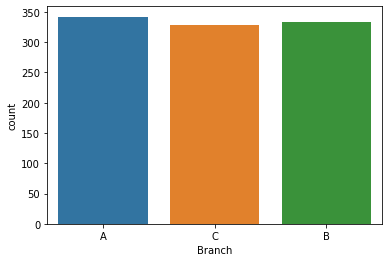

In [12]:
sns.countplot(x=df['Branch'])

<AxesSubplot:>

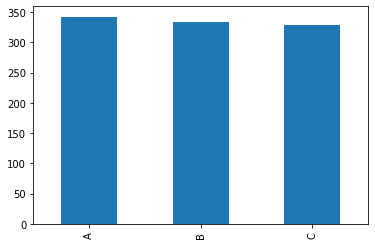

In [13]:
# 自己加：上面的 .countplot() 和下面这种画法是一样的
df['Branch'].value_counts().plot(kind='bar')

In [14]:
df['Branch'].value_counts()

A    342
B    333
C    328
Name: Branch, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Payment'>

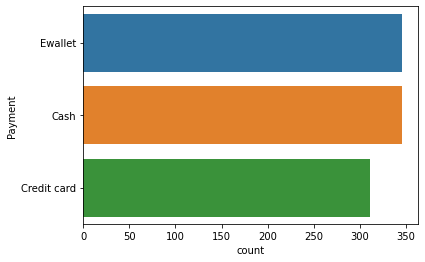

In [15]:
# We can use the countplot just about for any categorical variable
# For example, how many users use certain payment methods versus other payment methods
sns.countplot(y=df['Payment'])

### Task 3: Bivariate Analysis

In this section, we are gonna look at more than one variables at a time.

上个 section，so far，we've looked at:
* distribution plot (for continues variable)
* count plot (for categorical variable)

Now we will look at scatter plot.

**Question 3:** Is there a relationship between gross income and customer ratings?

<AxesSubplot:xlabel='Rating', ylabel='gross income'>

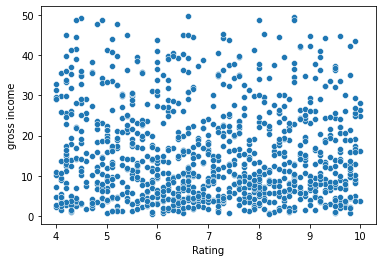

In [16]:
# Essentially, we want to see, is our customer ratings inferenced by how much they spend?
sns.scatterplot(x=df['Rating'], y=df['gross income'])

# It doesn't look like there is any inference at all! There doesn't seem to be a relationship between customer rating 
# and gross income.b

<AxesSubplot:xlabel='Rating', ylabel='gross income'>

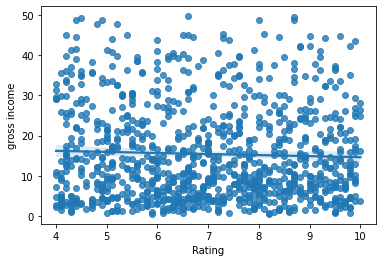

In [17]:
# If we want to see the trend line, you can simply replace .scatterplot with .regplot
sns.regplot(x=df['Rating'], y=df['gross income'])

<AxesSubplot:xlabel='Branch', ylabel='gross income'>

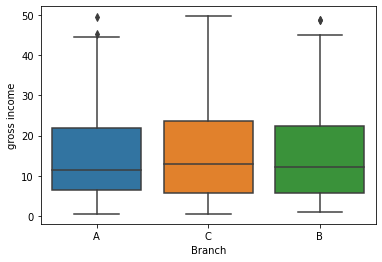

In [18]:
# I also want to see if different branches of the supermarket chain show different average gross income. 
# We can do a box plot
sns.boxplot(x=df['Branch'], y=df['gross income'])

# There doesn't seem to be much variation in gross income between different branches
# The mean income between branches 几乎相等，都是 slightly above 10

<AxesSubplot:title={'center':'gross income'}, xlabel='Branch'>

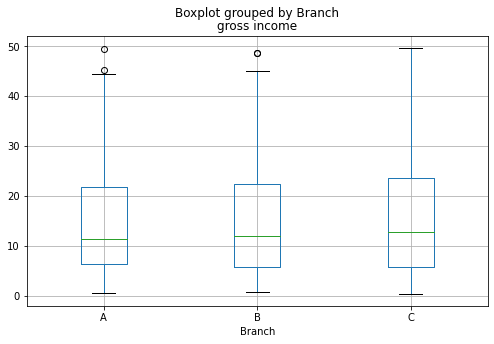

In [19]:
# 自己加（对比上面 seaborn 的画法）
df.boxplot(column='gross income', by='Branch', figsize=(8,5))

<AxesSubplot:xlabel='gross income'>

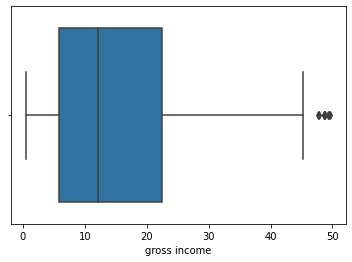

In [20]:
# 自己试 / 加
sns.boxplot(x=df['gross income'])

<AxesSubplot:ylabel='gross income'>

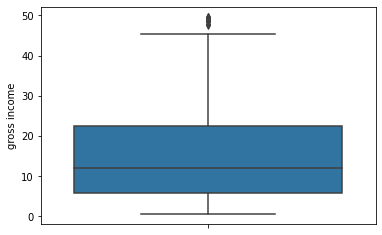

In [21]:
sns.boxplot(y=df['gross income'])

<AxesSubplot:xlabel='Gender', ylabel='gross income'>

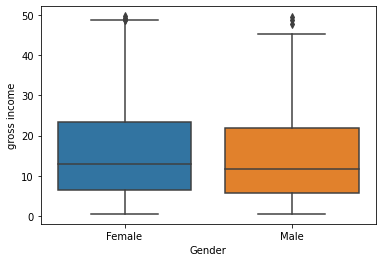

In [22]:
# Now we are interested to see if there is any relationship between gender and gross income?
sns.boxplot(x=df['Gender'], y=df['gross income'])
# It looks like men and women in this dataset is about to spend the same

**Question 4:** Is there a noticeable time trend in gross income?

In [23]:
# To see the time trend, we can use the seaborn line plot

# We cannot use the dataframe as-is for this particular plot, because as we can see, the dates are repeated, because
# there can be multiple customers at any given date. So we have to aggregate the data somehow.
display( df.head() )

display( df.groupby(df.index).mean() )

Invoice ID Branch       City Customer type  Gender  \
Date                                                              
2019-01-05  750-67-8428      A     Yangon        Member  Female   
2019-03-08  226-31-3081      C  Naypyitaw        Normal  Female   
2019-03-03  631-41-3108      A     Yangon        Normal    Male   
2019-01-27  123-19-1176      A     Yangon        Member    Male   
2019-02-08  373-73-7910      A     Yangon        Normal    Male   

                      Product line  Unit price  Quantity   Tax 5%     Total  \
Date                                                                          
2019-01-05       Health and beauty       74.69       7.0  26.1415  548.9715   
2019-03-08  Electronic accessories       15.28       5.0   3.8200   80.2200   
2019-03-03      Home and lifestyle       46.33       7.0  16.2155  340.5255   
2019-01-27       Health and beauty       58.22       8.0  23.2880  489.0480   
2019-02-08       Sports and travel       86.31       7.0  30.2085  634.3785   

             Time      Payment    cogs  gross margin percentage  gross income  \
Date                                                                            
2019-01-05  13:08      Ewallet  522.83                 4.761905       26.1415   
2019-03-08  10:29         Cash   76.40                 4.761905        3.8200   
2019-03-03  13:23  Credit card  324.31                 4.761905       16.2155   
2019-01-27  20:33      Ewallet  465.76                 4.761905       23.2880   
2019-02-08  10:37      Ewallet  604.17                 4.761905       30.2085   

            Rating  
Date                
2019-01-05     9.1  
2019-03-08     9.6  
2019-03-03     7.4  
2019-01-27     8.4  
2019-02-08     5.3

Unit price  Quantity     Tax 5%       Total        cogs  \
Date                                                                  
2019-01-01   54.995833  6.454545  18.830083  395.431750  376.601667   
2019-01-02   44.635000  6.000000  11.580375  243.187875  231.607500   
2019-01-03   59.457500  4.625000  12.369813  259.766062  247.396250   
2019-01-04   51.743333  5.333333  12.886417  270.614750  257.728333   
2019-01-05   61.636667  4.583333  14.034458  294.723625  280.689167   
...                ...       ...        ...         ...         ...   
2019-03-26   42.972308  4.000000   7.188692  150.962538  143.773846   
2019-03-27   56.841000  4.500000  13.822950  290.281950  276.459000   
2019-03-28   45.525000  4.800000  10.616200  222.940200  212.324000   
2019-03-29   66.346250  6.750000  23.947875  502.905375  478.957500   
2019-03-30   67.408182  5.888889  19.424500  407.914500  388.490000   

            gross margin percentage  gross income    Rating  
Date                                                         
2019-01-01                 4.761905     18.830083  6.583333  
2019-01-02                 4.761905     11.580375  6.050000  
2019-01-03                 4.761905     12.369813  8.112500  
2019-01-04                 4.761905     12.886417  6.516667  
2019-01-05                 4.761905     14.034458  7.433333  
...                             ...           ...       ...  
2019-03-26                 4.761905      7.188692  6.623077  
2019-03-27                 4.761905     13.822950  6.760000  
2019-03-28                 4.761905     10.616200  7.050000  
2019-03-29                 4.761905     23.947875  6.925000  
2019-03-30                 4.761905     19.424500  6.800000  

[89 rows x 8 columns]

<AxesSubplot:xlabel='Date', ylabel='gross income'>

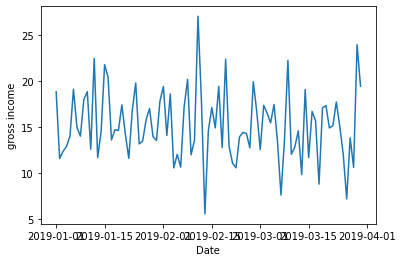

In [24]:
sns.lineplot(x=df.groupby(df.index).mean().index,
             y=df.groupby(df.index).mean()['gross income'])

We don't notice any time trend in this graph. It looks like it varies around the same mean. There are some days there are very high gross income. Some days very low gross income.

There doesn't seem to be a particular trend. Maybe because here we only look at 3-month data.

<AxesSubplot:xlabel='Date', ylabel='gross income'>

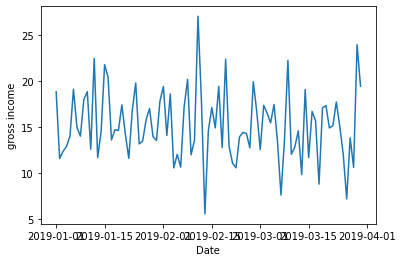

In [25]:
# 自己加（对比上面，如果不specify x，那么 x 默认为 index）
sns.lineplot(df.groupby(df.index).mean()['gross income'])

<AxesSubplot:xlabel='Date'>

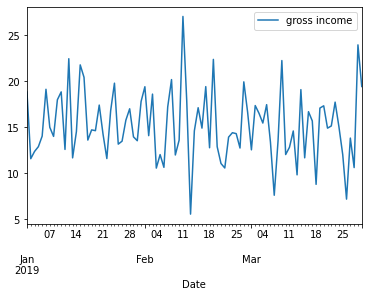

In [26]:
# 自己加（对比上面 seaborn 的画法）
df.groupby(df.index).mean().plot(y='gross income')

ValueError: cannot reindex from a duplicate axis

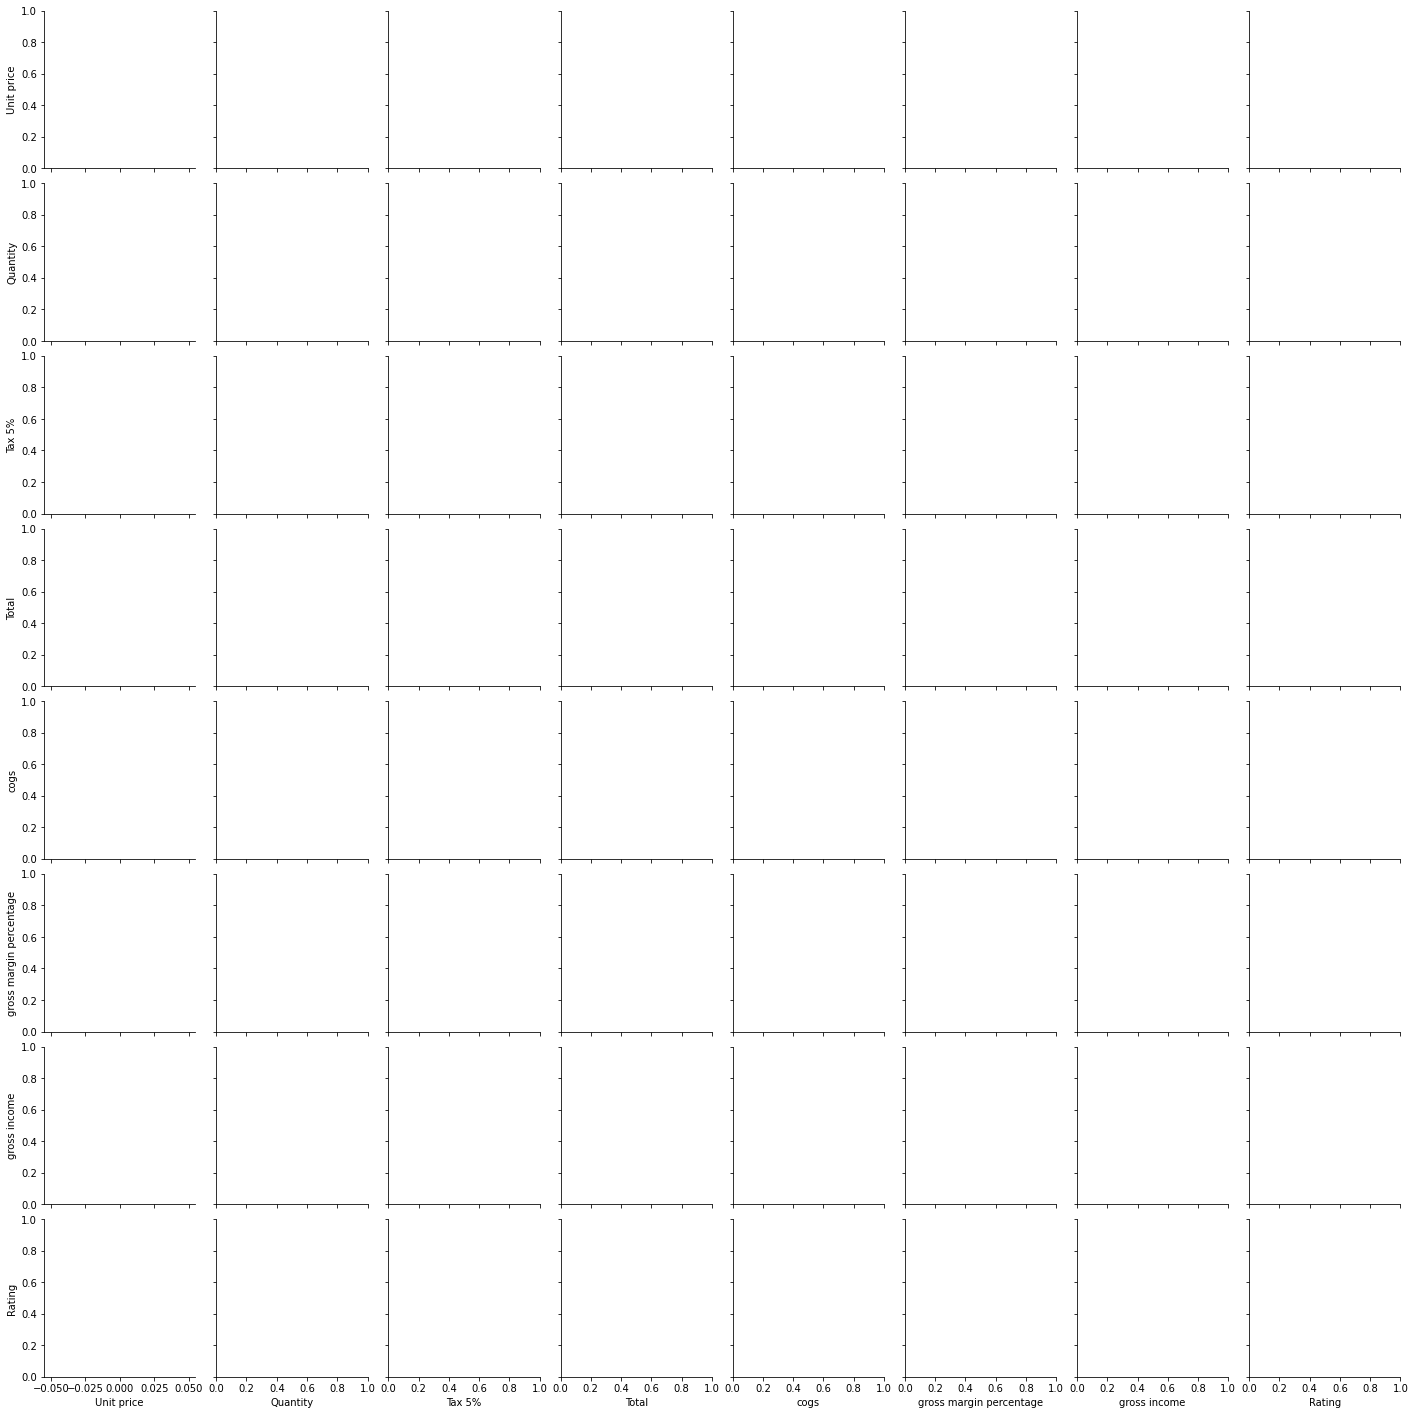

In [27]:
# If we want to plot all the bivariate relationshiops possible, there is a way to do that in seaborn. 
# It is to use pairplot.
# This is quite time consuming, since it's ploting for all pairwise combination of your dataset. 
# So we don't recommend this for dataset with a lot of columns
sns.pairplot(df)

In [29]:
df.dropna().index.is_unique

False

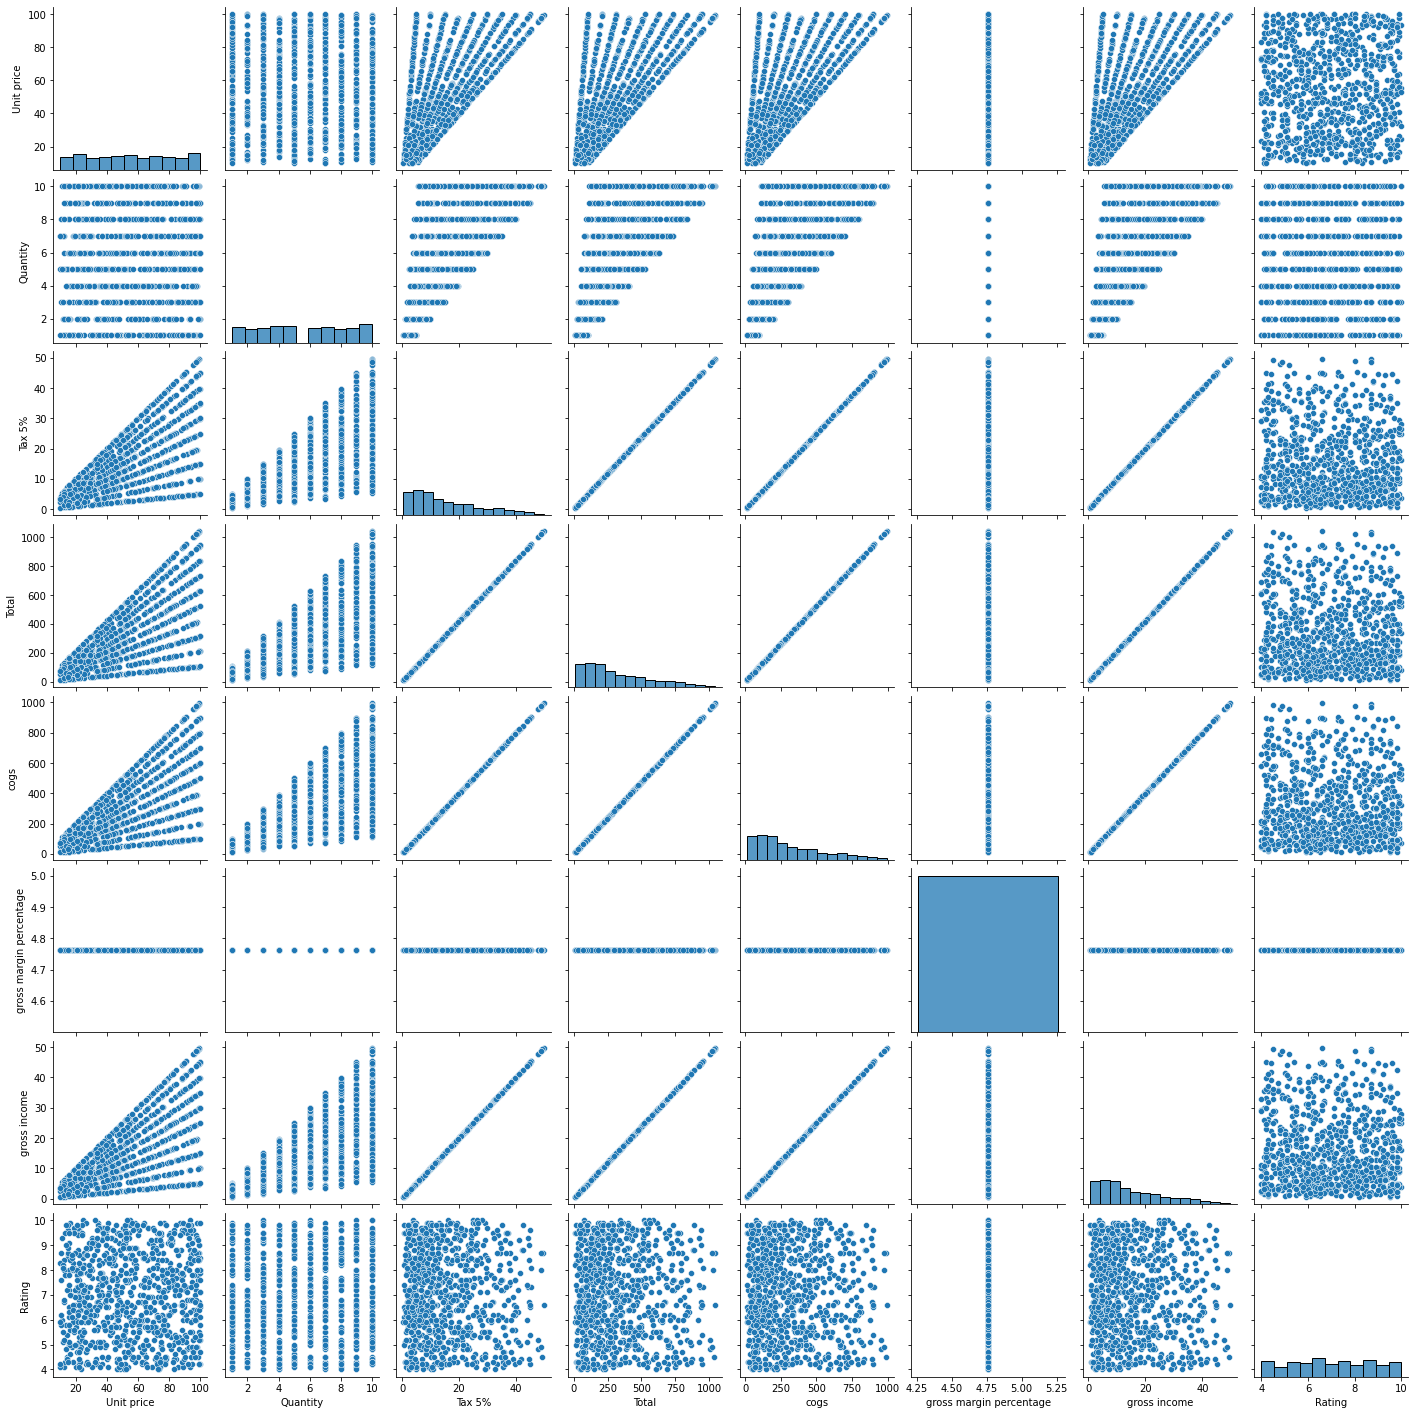

In [28]:
sns.pairplot(df.dropna())

In [30]:
df.shape

(1003, 16)

In [33]:
df.dropna().duplicated().sum()

1

In [32]:
df[df.isna().any(axis=1)]

Invoice ID Branch       City Customer type  Gender  \
Date                                                              
2019-02-25  355-53-5943      A     Yangon        Member  Female   
2019-02-24  315-22-5665      C  Naypyitaw        Normal  Female   
2019-01-10  665-32-9167      A     Yangon        Member  Female   
2019-02-20  692-92-5582      B   Mandalay        Member  Female   
2019-03-11  656-95-9349      A     Yangon           NaN  Female   
...                 ...    ...        ...           ...     ...   
2019-01-29  233-67-5758      C  Naypyitaw        Normal    Male   
2019-03-02  303-96-2227      B   Mandalay        Normal  Female   
2019-02-09  727-02-1313      A     Yangon        Member    Male   
2019-03-10  745-74-0715      A     Yangon        Normal    Male   
2019-01-26  452-04-8808      B   Mandalay        Normal    Male   

                      Product line  Unit price  Quantity   Tax 5%      Total  \
Date                                                                           
2019-02-25                     NaN       68.84       6.0  20.6520   433.6920   
2019-02-24                     NaN       73.56      10.0  36.7800   772.3800   
2019-01-10                     NaN       36.26       2.0   3.6260    76.1460   
2019-02-20                     NaN       54.84       3.0   8.2260   172.7460   
2019-03-11       Health and beauty       68.93       7.0  24.1255   506.6355   
...                            ...         ...       ...      ...        ...   
2019-01-29       Health and beauty         NaN       1.0   2.0175    42.3675   
2019-03-02      Home and lifestyle         NaN      10.0  48.6900  1022.4900   
2019-02-09      Food and beverages         NaN       1.0   1.5920    33.4320   
2019-03-10  Electronic accessories         NaN       2.0   5.8030   121.8630   
2019-01-26  Electronic accessories       87.08       NaN  30.4780   640.0380   

             Time      Payment    cogs  gross margin percentage  gross income  \
Date                                                                            
2019-02-25  14:36      Ewallet  413.04                 4.761905       20.6520   
2019-02-24  11:38      Ewallet  735.60                 4.761905       36.7800   
2019-01-10  17:15  Credit card   72.52                 4.761905        3.6260   
2019-02-20  13:27  Credit card  164.52                 4.761905        8.2260   
2019-03-11  11:03  Credit card  482.51                 4.761905       24.1255   
...           ...          ...     ...                      ...           ...   
2019-01-29  13:46      Ewallet   40.35                 4.761905        2.0175   
2019-03-02  17:16      Ewallet  973.80                 4.761905       48.6900   
2019-02-09  13:22         Cash   31.84                 4.761905        1.5920   
2019-03-10  20:46      Ewallet  116.06                 4.761905        5.8030   
2019-01-26  15:17         Cash  609.56                 4.761905       30.4780   

            Rating  
Date                
2019-02-25     5.8  
2019-02-24     8.0  
2019-01-10     7.2  
2019-02-20     5.9  
2019-03-11     4.6  
...            ...  
2019-01-29     6.2  
2019-03-02     4.4  
2019-02-09     7.7  
2019-03-10     8.8  
2019-01-26     5.5  

[138 rows x 16 columns]

### Task 4: Dealing With Duplicate Rows and Missing Values

In [35]:
df.duplicated().sum()

# There are 3 rows that are duplicated which we want to remove.

3

In [36]:
# Before removing dup, if we want to see waht the duplicate rows are, we can do below
df[df.duplicated()]
# These particular rows below are repeated more than once.b

Invoice ID Branch      City Customer type  Gender  \
Date                                                             
2019-02-18  849-09-3807      A    Yangon        Member  Female   
2019-03-10  745-74-0715      A    Yangon        Normal    Male   
2019-01-26  452-04-8808      B  Mandalay        Normal    Male   

                      Product line  Unit price  Quantity  Tax 5%    Total  \
Date                                                                        
2019-02-18     Fashion accessories       88.34       7.0  30.919  649.299   
2019-03-10  Electronic accessories         NaN       2.0   5.803  121.863   
2019-01-26  Electronic accessories       87.08       NaN  30.478  640.038   

             Time  Payment    cogs  gross margin percentage  gross income  \
Date                                                                        
2019-02-18  13:28     Cash  618.38                 4.761905        30.919   
2019-03-10  20:46  Ewallet  116.06                 4.761905         5.803   
2019-01-26  15:17     Cash  609.56                 4.761905        30.478   

            Rating  
Date                
2019-02-18     6.6  
2019-03-10     8.8  
2019-01-26     5.5

In [37]:
# Remove duplicated rows
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

Now we talk about missing values.

In [38]:
# To see the total number of missing value per column
df.isna().sum()

Invoice ID                  0
Branch                      0
City                        0
Customer type              79
Gender                      0
Product line               43
Unit price                  6
Quantity                   19
Tax 5%                      0
Total                       0
Time                        0
Payment                     0
cogs                        0
gross margin percentage     0
gross income                0
Rating                      0
dtype: int64

In [39]:
# The ratio of missing values
df.isna().mean()

# 或 df.isna().sum() / len(df)

Invoice ID                 0.000
Branch                     0.000
City                       0.000
Customer type              0.079
Gender                     0.000
Product line               0.043
Unit price                 0.006
Quantity                   0.019
Tax 5%                     0.000
Total                      0.000
Time                       0.000
Payment                    0.000
cogs                       0.000
gross margin percentage    0.000
gross income               0.000
Rating                     0.000
dtype: float64

<AxesSubplot:ylabel='Date'>

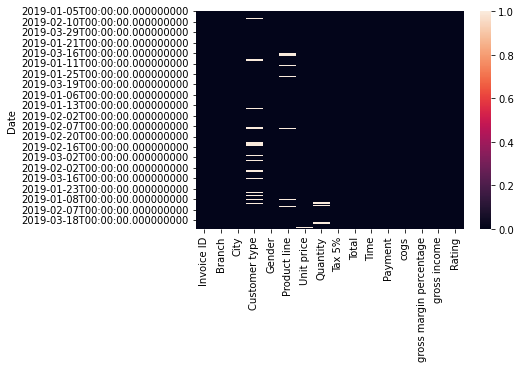

In [40]:
# A cool way to visualize this is by using the seaborn heatmap
sns.heatmap(df.isnull())

<AxesSubplot:ylabel='Date'>

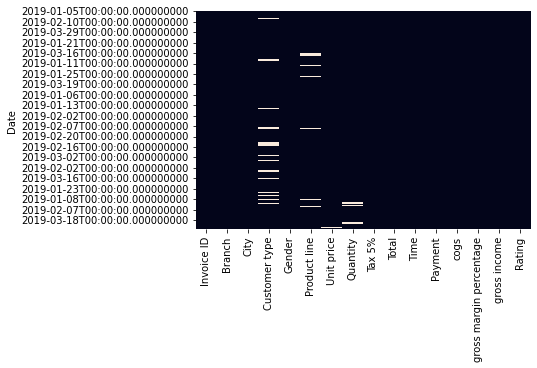

In [41]:
sns.heatmap(df.isnull(), cbar=False)

In [43]:
# How can we deal with missing data?
# fill with 0
df.fillna(0)

Invoice ID Branch       City Customer type  Gender  \
Date                                                              
2019-01-05  750-67-8428      A     Yangon        Member  Female   
2019-03-08  226-31-3081      C  Naypyitaw        Normal  Female   
2019-03-03  631-41-3108      A     Yangon        Normal    Male   
2019-01-27  123-19-1176      A     Yangon        Member    Male   
2019-02-08  373-73-7910      A     Yangon        Normal    Male   
...                 ...    ...        ...           ...     ...   
2019-01-29  233-67-5758      C  Naypyitaw        Normal    Male   
2019-03-02  303-96-2227      B   Mandalay        Normal  Female   
2019-02-09  727-02-1313      A     Yangon        Member    Male   
2019-02-22  347-56-2442      A     Yangon        Normal    Male   
2019-02-18  849-09-3807      A     Yangon        Member  Female   

                      Product line  Unit price  Quantity   Tax 5%      Total  \
Date                                                                           
2019-01-05       Health and beauty       74.69       7.0  26.1415   548.9715   
2019-03-08  Electronic accessories       15.28       5.0   3.8200    80.2200   
2019-03-03      Home and lifestyle       46.33       7.0  16.2155   340.5255   
2019-01-27       Health and beauty       58.22       8.0  23.2880   489.0480   
2019-02-08       Sports and travel       86.31       7.0  30.2085   634.3785   
...                            ...         ...       ...      ...        ...   
2019-01-29       Health and beauty        0.00       1.0   2.0175    42.3675   
2019-03-02      Home and lifestyle        0.00      10.0  48.6900  1022.4900   
2019-02-09      Food and beverages        0.00       1.0   1.5920    33.4320   
2019-02-22      Home and lifestyle       65.82       1.0   3.2910    69.1110   
2019-02-18     Fashion accessories       88.34       7.0  30.9190   649.2990   

             Time      Payment    cogs  gross margin percentage  gross income  \
Date                                                                            
2019-01-05  13:08      Ewallet  522.83                 4.761905       26.1415   
2019-03-08  10:29         Cash   76.40                 4.761905        3.8200   
2019-03-03  13:23  Credit card  324.31                 4.761905       16.2155   
2019-01-27  20:33      Ewallet  465.76                 4.761905       23.2880   
2019-02-08  10:37      Ewallet  604.17                 4.761905       30.2085   
...           ...          ...     ...                      ...           ...   
2019-01-29  13:46      Ewallet   40.35                 4.761905        2.0175   
2019-03-02  17:16      Ewallet  973.80                 4.761905       48.6900   
2019-02-09  13:22         Cash   31.84                 4.761905        1.5920   
2019-02-22  15:33         Cash   65.82                 4.761905        3.2910   
2019-02-18  13:28         Cash  618.38                 4.761905       30.9190   

            Rating  
Date                
2019-01-05     9.1  
2019-03-08     9.6  
2019-03-03     7.4  
2019-01-27     8.4  
2019-02-08     5.3  
...            ...  
2019-01-29     6.2  
2019-03-02     4.4  
2019-02-09     7.7  
2019-02-22     4.1  
2019-02-18     6.6  

[1000 rows x 16 columns]

In [54]:
# fill the missing data with the mean of each column
df.fillna(df.mean(), inplace=True)
# df.fillna(df.mean(numeric_only=True), inplace=True)

# 上面这种方法，when we fill the missing value with mean, it only fills the numeric columns

/Users/shihaosun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


<AxesSubplot:ylabel='Date'>

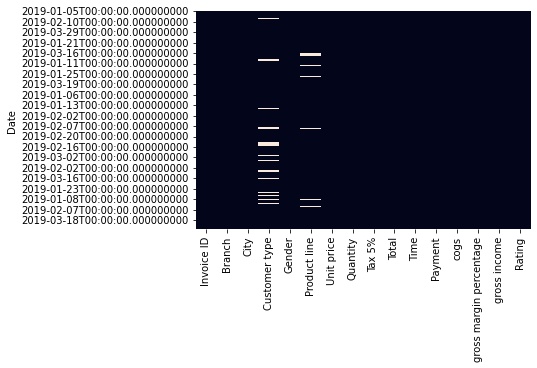

In [55]:
# 上面这种方法，when we fill the missing value with mean, it only fills the numeric columns
# 可以看到 categorical column 的 missing value依然健在，因为 there is no way to calcualte the mean of a categorical column
sns.heatmap(df.isnull(), cbar=False)

In [60]:
# To deal will the missing value in categorical column, 
# we can replace the missing value with the mode of that particular column
display( df.mode() )

display( df.mode().iloc[0] )

df.fillna(df.mode().iloc[0], inplace=True)

Invoice ID Branch    City Customer type  Gender         Product line  \
0    101-17-6199      A  Yangon        Normal  Female  Fashion accessories   
1    101-81-4070    NaN     NaN           NaN     NaN                  NaN   
2    102-06-2002    NaN     NaN           NaN     NaN                  NaN   
3    102-77-2261    NaN     NaN           NaN     NaN                  NaN   
4    105-10-6182    NaN     NaN           NaN     NaN                  NaN   
..           ...    ...     ...           ...     ...                  ...   
995  894-41-5205    NaN     NaN           NaN     NaN                  NaN   
996  895-03-6665    NaN     NaN           NaN     NaN                  NaN   
997  895-66-0685    NaN     NaN           NaN     NaN                  NaN   
998  896-34-0956    NaN     NaN           NaN     NaN                  NaN   
999  898-04-2717    NaN     NaN           NaN     NaN                  NaN   

     Unit price  Quantity   Tax 5%     Total   Time  Payment    cogs  \
0     55.700292      10.0   4.1540   87.2340  14:42  Ewallet   83.08   
1           NaN       NaN   4.4640   93.7440  19:48      NaN   89.28   
2           NaN       NaN   8.3770  175.9170    NaN      NaN  167.54   
3           NaN       NaN   9.0045  189.0945    NaN      NaN  180.09   
4           NaN       NaN  10.3260  216.8460    NaN      NaN  206.52   
..          ...       ...      ...       ...    ...      ...     ...   
995         NaN       NaN      NaN       NaN    NaN      NaN     NaN   
996         NaN       NaN      NaN       NaN    NaN      NaN     NaN   
997         NaN       NaN      NaN       NaN    NaN      NaN     NaN   
998         NaN       NaN      NaN       NaN    NaN      NaN     NaN   
999         NaN       NaN      NaN       NaN    NaN      NaN     NaN   

     gross margin percentage  gross income  Rating  
0                   4.761905        4.1540     6.0  
1                        NaN        4.4640     NaN  
2                        NaN        8.3770     NaN  
3                        NaN        9.0045     NaN  
4                        NaN       10.3260     NaN  
..                       ...           ...     ...  
995                      NaN           NaN     NaN  
996                      NaN           NaN     NaN  
997                      NaN           NaN     NaN  
998                      NaN           NaN     NaN  
999                      NaN           NaN     NaN  

[1000 rows x 16 columns]

Invoice ID                         101-17-6199
Branch                                       A
City                                    Yangon
Customer type                           Normal
Gender                                  Female
Product line               Fashion accessories
Unit price                           55.700292
Quantity                                  10.0
Tax 5%                                   4.154
Total                                   87.234
Time                                     14:42
Payment                                Ewallet
cogs                                     83.08
gross margin percentage               4.761905
gross income                             4.154
Rating                                     6.0
Name: 0, dtype: object

<AxesSubplot:ylabel='Date'>

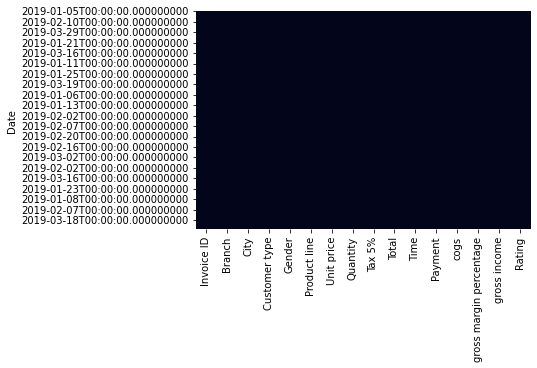

In [62]:
sns.heatmap(df.isnull(), cbar=False)

In [65]:
# Now, we would like to show how the pandas_profiling package can really streamline what we have done
dataset = pd.read_csv('supermarket_sales.csv')
prof = ProfileReport(dataset)
prof

# if you have a large dataset, using pandas_profiling may not be feasible

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Task 5: Correlation Analysis

In this section, we are going to look at correlation analysis and how we can interprate the results.

In [66]:
# 想计算两个 column 的 correlation，可以用 numpy
np.corrcoef(df['gross income'], df['Rating'])

array([[ 1.       , -0.0364417],
       [-0.0364417,  1.       ]])

In [67]:
round(np.corrcoef(df['gross income'], df['Rating'])[1][0], 2)      # round to two decimal places

-0.04

In [68]:
# Correlation matrix
df.corr()

Unit price  Quantity    Tax 5%     Total      cogs  \
Unit price                 1.000000  0.014786  0.629034  0.629034  0.629034   
Quantity                   0.014786  1.000000  0.704067  0.704067  0.704067   
Tax 5%                     0.629034  0.704067  1.000000  1.000000  1.000000   
Total                      0.629034  0.704067  1.000000  1.000000  1.000000   
cogs                       0.629034  0.704067  1.000000  1.000000  1.000000   
gross margin percentage         NaN       NaN       NaN       NaN       NaN   
gross income               0.629034  0.704067  1.000000  1.000000  1.000000   
Rating                    -0.006601 -0.021225 -0.036442 -0.036442 -0.036442   

                         gross margin percentage  gross income    Rating  
Unit price                                   NaN      0.629034 -0.006601  
Quantity                                     NaN      0.704067 -0.021225  
Tax 5%                                       NaN      1.000000 -0.036442  
Total                                        NaN      1.000000 -0.036442  
cogs                                         NaN      1.000000 -0.036442  
gross margin percentage                      NaN           NaN       NaN  
gross income                                 NaN      1.000000 -0.036442  
Rating                                       NaN     -0.036442  1.000000

In [70]:
np.corrcoef(df['gross margin percentage'], df['Rating'])

/Users/shihaosun/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/shihaosun/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


array([[nan, nan],
       [nan,  1.]])

In [69]:
df['gross margin percentage'].isna().sum()

0

In [72]:
df['gross margin percentage'].value_counts()

4.761905    1000
Name: gross margin percentage, dtype: int64

In [75]:
df['gross margin percentage']

Date
2019-01-05    4.761905
2019-03-08    4.761905
2019-03-03    4.761905
2019-01-27    4.761905
2019-02-08    4.761905
                ...   
2019-01-29    4.761905
2019-03-02    4.761905
2019-02-09    4.761905
2019-02-22    4.761905
2019-02-18    4.761905
Name: gross margin percentage, Length: 1000, dtype: float64

In [76]:
# We can round the numbers up to two decimal places
np.round(df.corr(), 2)

Unit price  Quantity  Tax 5%  Total  cogs  \
Unit price                     1.00      0.01    0.63   0.63  0.63   
Quantity                       0.01      1.00    0.70   0.70  0.70   
Tax 5%                         0.63      0.70    1.00   1.00  1.00   
Total                          0.63      0.70    1.00   1.00  1.00   
cogs                           0.63      0.70    1.00   1.00  1.00   
gross margin percentage         NaN       NaN     NaN    NaN   NaN   
gross income                   0.63      0.70    1.00   1.00  1.00   
Rating                        -0.01     -0.02   -0.04  -0.04 -0.04   

                         gross margin percentage  gross income  Rating  
Unit price                                   NaN          0.63   -0.01  
Quantity                                     NaN          0.70   -0.02  
Tax 5%                                       NaN          1.00   -0.04  
Total                                        NaN          1.00   -0.04  
cogs                                         NaN          1.00   -0.04  
gross margin percentage                      NaN           NaN     NaN  
gross income                                 NaN          1.00   -0.04  
Rating                                       NaN         -0.04    1.00

<AxesSubplot:>

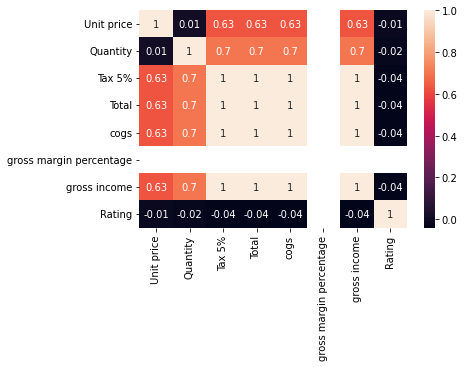

In [78]:
sns.heatmap(np.round(df.corr(), 2), annot=True)

### Helpful Links

1. More visualizations: https://www.data-to-viz.com/
2. Seaborn gallery: https://seaborn.pydata.org/examples/index.html
3. Pandas profiling documentation: https://pypi.org/project/pandas-profiling/